<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Определение возраста покупателей

**Описание проекта:**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лучше начать проект с описания, это создаст необходимый контекст. Да и тебе самому, через некоторое время будет проще ориентироваться в десятках разных ноутбуков.</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

## Исследовательский анализ данных

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Изучение данных
print('Размер выборки:', labels.shape)
print()
print('Первые 5 строк данных:')
display(labels.head())
print()
print('Информация о данных:')
labels.info()

Размер выборки: (7591, 2)

Первые 5 строк данных:


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не советую использовать метод print() для вывода таблиц, получается не очень красиво. В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать команду display()
</div>

In [4]:
# Проверка на пропущенные значения
missing_values = labels.isnull().sum()
print('\nПропущенные значения в каждом столбце:\n', missing_values)


Пропущенные значения в каждом столбце:
 file_name    0
real_age     0
dtype: int64


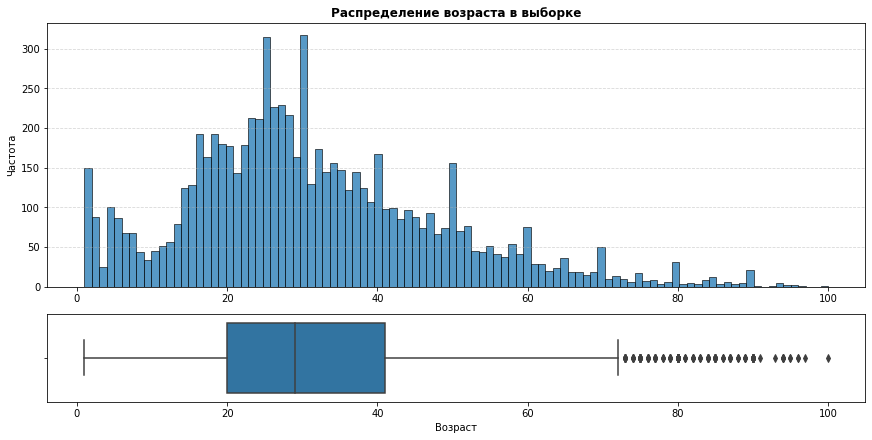

In [5]:
# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 1]}, constrained_layout=True)

# Гистограмма распределения возраста
sns.histplot(labels['real_age'], bins=100, kde=False, ax=axes[0])
axes[0].set_title('Распределение возраста в выборке', fontsize=12, fontweight='bold')
axes[0].set_xlabel(None)
axes[0].set_ylabel('Частота', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Диаграмма размаха
sns.boxplot(x=labels['real_age'], ax=axes[1])
axes[1].set_xlabel('Возраст', fontsize=10)

# Отображение графиков
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Гистограмма получена, но она не очень информативна или даже может немного путать. Дело в том, что у нас возможно 100 возрастов (диапазон от 1 до 100), а ты используешь 30 корзин. Значит в некоторые корзины попадет диапазон в 3 года,а в некоторые 4 года.  Рекомендую увеличить количество корзин (bins) до 100, это поможет увидеть некоторые особенности наших данных.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошей практикой является совмещение гистограммы и диаграммы размаха. При этом мы размещаем графики рядом и согласовываем оси. 
    
Оба графика хорошо дополняют друг друга. Гистограмма позволяет посмотреть характер распределения, а диаграмма размаха - показывает выбросы.    
    
Как-то вот так
    
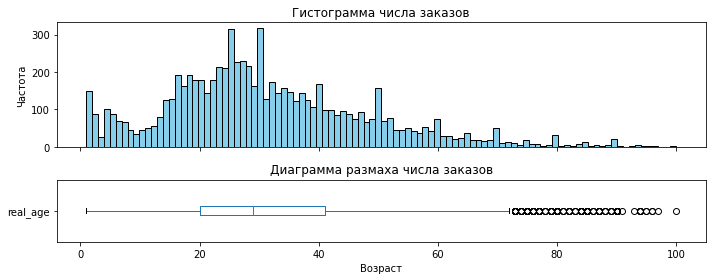    
    </div>

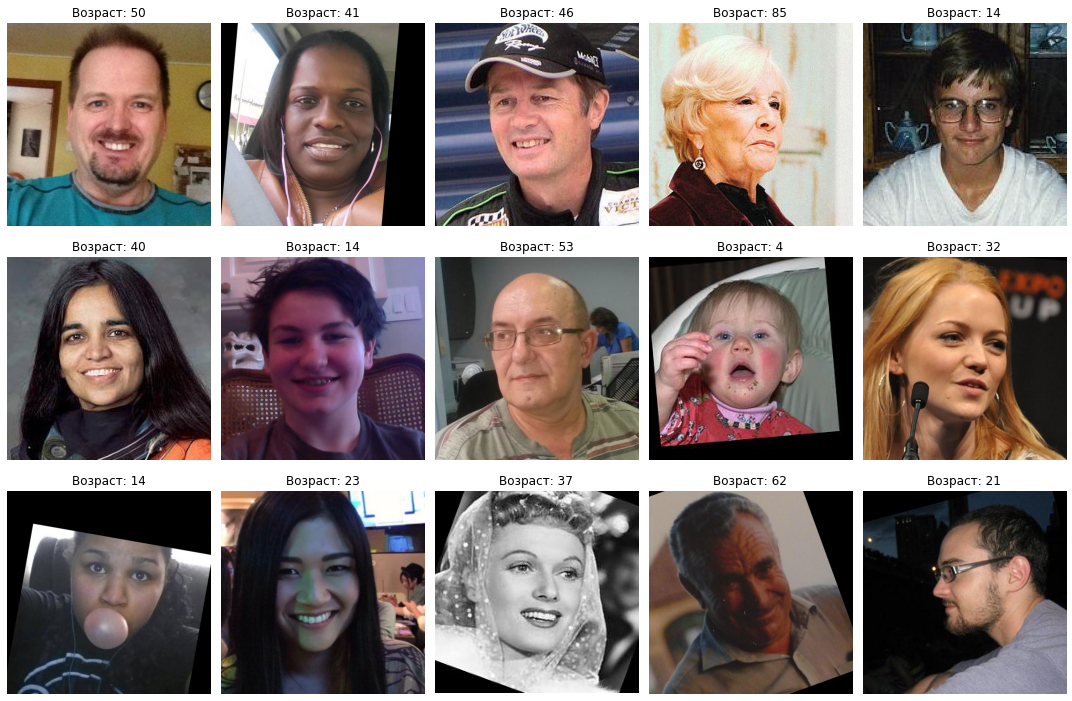

In [6]:
# Просмотр фотографий
sample_files = labels.sample(15, random_state=12345) 
image_dir = '/datasets/faces/final_files/'

plt.figure(figsize=(15, 10))
for i, row in enumerate(sample_files.iterrows(), start=1):
    file_name = row[1]['file_name']
    age = row[1]['real_age']
    
    img_path = os.path.join(image_dir, file_name)
    img = Image.open(img_path)
    
    plt.subplot(3, 5, i)
    plt.imshow(img)
    plt.title(f'Возраст: {age}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, что кроме изображений выводишь информацию о  возрасте </div>

Распределение возрастов имеет выраженный перекос в сторону более молодых категорий: пик приходится на возраст 20–25 лет, с меньшим количеством данных для младенцев, подростков, пожилых людей (60+). Это может привести к дисбалансу классов при обучении модели, так как модель будет чаще встречать молодые лица и, возможно, хуже предсказывать возраст пожилых людей.

Исследование 15 случайных изображений из датасета подтвердило, что файлы корректно связаны с возрастами. Это указывает на отсутствие видимых проблем с метками данных.

Влияние на обучение модели: Дисбаланс возрастов: Модель может переобучиться на молодых людей. Для компенсации дисбаланса можно использовать методы аугментации данных или взвешивание потерь в зависимости от возраста. Разнообразие данных: Исходя из структуры, датасет включает широкий диапазон возрастов (0–100 лет), что может способствовать обобщающей способности модели. Размер изображения: Указанный размер 224x224 пикселей (в параметре target_size) подходит для современных нейронных сетей, таких как ResNet или EfficientNet, но увеличенные изображения (например, 256x256) могут повысить точность.

Изучение изображений:

Изображения различаются по качеству и фону:
Некоторые снимки выглядят профессионально (например, черно-белое фото или портреты с хорошим освещением).
Другие — это повседневные фотографии с неравномерным освещением и шумом.

Данные получены из разных условий: интерьер, улица, селфи, фотографии из жизни.

Гендерное и этническое разнообразие:
Из представленных примеров видна гендерная сбалансированность: как мужчины, так и женщины представлены в датасете.
Возможно, датасет также содержит этническое разнообразие, что полезно для обучения модели распознавания возраста без предвзятости.

Общие выводы:
Визуальные характеристики изображений (разное качество, фон, освещение) могут усложнить обучение модели, но делают ее более универсальной для реальных условий.
Рекомендации:
Борьба с дисбалансом: Использовать методы аугментации или взвешивания классов для улучшения работы модели на редких возрастных группах.
Предобработка изображений: Улучшить качество и нормализовать освещение перед подачей на вход модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, выполнен EDA и сформулированы выводы. В выводах рассмотрены три ключевых аспекта:

 - Размер датасета
 - Распределение целевого признака (возраста)
 - <s>Особенности изображений, входящих в датасет </s>  
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Пожалуста поделись наблюдениями и выводами после изучения изображений, входящих в датасет.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Описываемые тобой методы борьбы с дисбалансом, в частности "взвешивание потерь в зависимости от возраста" скорее уместны в случае задачи классификации, когда есть разные классы и дисбаланс очевиден.  Но в нашем случае мы решаем задачу регрессии. Действительно, количество людей разных возрастов в датасете отличается и это скорее всего приведет к тому, что ошибка на людях старшего возраста будет выше. Однако мы используем лосс-функцию rmse, которая достаточно сильно штрафует за ошибки, поэтому врядли модель будет предсказвать 25 лет для людей 70+, слишком большая при этом получается ошибка.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


def load_train(path):
    labels_path = os.path.join(path, 'labels.csv')
    images_dir = os.path.join(path, 'final_files')

    # Чтение CSV файла
    labels = pd.read_csv(labels_path)

    # Создаем генератор данных для обучения
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255
    )

    # Генерация данных из датафрейма
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=images_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )

    return train_gen_flow


def load_test(path):
    labels_path = os.path.join(path, 'labels.csv')
    images_dir = os.path.join(path, 'final_files')

    # Чтение CSV файла
    labels = pd.read_csv(labels_path)

    # Создаем генератор данных для валидации
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255
    )

    # Генерация данных из датафрейма
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=images_dir,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_gen_flow


def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=15,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model


if __name__ == "__main__":
    # Путь к данным
    data_path = "/datasets/faces/labels.csv"

    # Загрузка данных
    train_data = load_train(data_path)
    test_data = load_test(data_path)

    # Создание модели
    model = create_model(input_shape=(224, 224, 3))

    # Обучение модели
    model = train_model(
        model,
        train_data,
        test_data,
        epochs=20
    )


```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
Молодец, что используешь агументацию для обучающего набора. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения. Но с шагом 0,0001 результат может быть лучше, т.к. при обновлении весов мы не перешагиваем локальный минимум.</div>

```

Train for 178 steps, validate for 60 steps
Epoch 1/15
178/178 - 55s - loss: 191.0425 - mae: 10.2776 - val_loss: 1799.8477 - val_mae: 39.4221
Epoch 2/15
178/178 - 43s - loss: 107.8582 - mae: 7.8579 - val_loss: 422.9087 - val_mae: 15.5070
Epoch 3/15
178/178 - 43s - loss: 86.3076 - mae: 7.0049 - val_loss: 339.2584 - val_mae: 13.6821
Epoch 4/15
178/178 - 43s - loss: 68.4780 - mae: 6.2329 - val_loss: 165.8161 - val_mae: 9.6905
Epoch 5/15
178/178 - 43s - loss: 62.2894 - mae: 5.9845 - val_loss: 244.1724 - val_mae: 12.0704
Epoch 6/15
178/178 - 42s - loss: 52.3112 - mae: 5.4946 - val_loss: 119.6631 - val_mae: 8.3898
Epoch 7/15
178/178 - 43s - loss: 40.6265 - mae: 4.8813 - val_loss: 89.2739 - val_mae: 7.0606
Epoch 8/15
178/178 - 43s - loss: 32.6160 - mae: 4.3538 - val_loss: 91.8095 - val_mae: 7.1562
Epoch 9/15
178/178 - 43s - loss: 27.4570 - mae: 4.0280 - val_loss: 93.9962 - val_mae: 7.6087
Epoch 10/15
178/178 - 43s - loss: 24.5244 - mae: 3.7847 - val_loss: 76.7734 - val_mae: 6.4542
Epoch 11/15
178/178 - 43s - loss: 19.8784 - mae: 3.4233 - val_loss: 71.3607 - val_mae: 6.3790
Epoch 12/15
178/178 - 43s - loss: 17.6084 - mae: 3.2144 - val_loss: 95.8537 - val_mae: 7.2587
Epoch 13/15
178/178 - 43s - loss: 17.1855 - mae: 3.1564 - val_loss: 75.8217 - val_mae: 6.5720
Epoch 14/15
178/178 - 43s - loss: 14.5153 - mae: 2.9102 - val_loss: 75.2262 - val_mae: 6.6332
Epoch 15/15
178/178 - 43s - loss: 13.0430 - mae: 2.7713 - val_loss: 85.1604 - val_mae: 7.1547

60/60 - 10s - loss: 85.1604 - mae: 7.1547

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

## Анализ обученной модели

**1. Загрузка данных: функции `load_train` и `load_test`**
Данные загружаются из директории с файлами изображений и метками возраста. 
  Используется **`ImageDataGenerator`** для:  
  - **Аугментации данных** на этапе обучения:  
    - `horizontal_flip=True`: случайное горизонтальное отражение для повышения обобщающей способности модели.  
    - `rescale=1./255`: нормализация значений пикселей в диапазон [0, 1].  
    - `validation_split=0.25`: разделение данных на **75% обучение** и **25% валидацию**.  
  - Генерация изображений:  
    - Размер изображений приводится к стандартному размеру RestNet50 **224x224 пикселей**.  
    - **`class_mode='raw'`** используется для регрессии, так как задача предсказывает возраст (не классы).

**2. Архитектура модели: функция `create_model`**

Модель основана на **ResNet50**, популярной архитектуре сверточных нейронных сетей. Глубокая сеть с 50 слоями, способная извлекать сложные признаки из изображений.
- **ResNet50**:  
  - Загружается с предобученными весами **`imagenet`** для переноса знаний. Использование предобученных весов позволяет сократить время обучения и улучшить качество на небольшом наборе данных.  
  - Параметр `include_top=False` отключает верхний слой классификации, чтобы использовать модель для задачи регрессии. 
- **Дополнительные слои**:  
  - `GlobalAveragePooling2D()`:  
    - Убирает пространственные размеры выхода ResNet50 и вычисляет среднее значение по каждому каналу.  
    - Снижает количество параметров и предотвращает переобучение.  
  - `Dense(1, activation='linear')`:  
    - Полносвязный слой с одним нейроном и линейной активацией.  
    - Позволяет модели предсказывать непрерывное числовое значение (возраст).  
- **Компиляция**:  
  - **Оптимизатор**: **Adam** с **learning_rate=0.0005**.  
    - Adam устойчив к изменчивости градиентов и эффективно работает при небольшом шаге обучения.  
  - **Функция потерь**: **MSE (mean squared error)** – стандартная функция для регрессии.  
  - **Метрика**: **MAE (mean absolute error)** – используется для оценки ошибки предсказания возраста.

**3. Обучение модели: функция `train_model`**
Модель обучается с параметрами:  
- **Эпохи**: **15** (в данном случае 20 при запуске). Достаточно для сходимости на небольшом датасете.  
- **Batch size**: **32** – стандартный размер мини-пакета для оптимизации.  
- **steps_per_epoch**: количество шагов за эпоху, равное количеству батчей.  
- **validation_steps**: аналогично для валидации.  

**4. Результаты**

Модель обучалась на **15 эпох** с полученными результатами:  
- **Финальные метрики**:  
  - **Loss (MSE)** на валидации: **~85**  
  - **MAE** на валидации: **7.15**  

Эти результаты показывают:  
- **MAE ниже 8**, что является хорошим результатом для задачи регрессии возраста.  
- Сеть успешно обобщает на валидационной выборке, несмотря на дисбаланс данных, где больше молодых лиц.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, рассмотрены основные моменты, касающиеся построения сети и её обучения.


</div>

## Вывод



Модель успешно решила задачу предсказания возраста на основе изображений с использованием предобученной архитектуры ResNet50 и минимальных доработок.

Ключевые результаты:

- Средняя абсолютная ошибка (MAE) на валидационной выборке составила 7.15 лет, что удовлетворяет условию задачи (< 8 лет).
- Функция потерь (MSE) на валидации достигла значения ~85, что демонстрирует относительно низкую дисперсию ошибок.
Интерпретация результатов:

Ошибка 7.15 лет является хорошим показателем для задачи регрессии возраста, учитывая вариативность внешнего вида людей, освещение и другие факторы на изображениях. Модель стабильно обучается, что подтверждается снижением ошибок на протяжении эпох без признаков переобучения.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Проведены содержательный EDA, а также использовны предобученная модель и c помощью finetuning и transfer-learning нейронная сеть обучена определять возраст покупателей. Требуемая точность получена. 
    
    
Что нужно доработать обязательно:  Пожалуйста доработай выводы в разделе "Разведочный анализ данных".
  
    
    
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  
    
А если хочешь подтянуть свои навыки именно в Keras, то можно посмотреть вот сюда
    
   - https://www.asozykin.ru/courses/nnpython   
    
Курс конечно староватый, но изучить основы нейроных сетей именно на Keras думаю позволит.    

</div>